In [1]:
#Load modules in
import sys
import os
import pathlib
import datetime
import numpy as np
import pandas as pd
import scipy.stats as sp
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import pingouin as pg
pd.options.display.max_columns = 150
%matplotlib inline
sns.set()
pd.set_option('display.max_rows', 250)
sns.set_style("whitegrid")
from scipy.stats import ttest_ind
from statsmodels.stats.anova import AnovaRM
import warnings
warnings.filterwarnings('ignore')
path = "../models"
if not path in sys.path:
    sys.path.append(path)
%reload_ext autoreload
%autoreload 1
from statannot import add_stat_annotation

import dishpill_models

/opt/conda/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.11, the latest is 0.5.0.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
#Create a merged dataframe and make sure we're only looking at the first half.  
all_dfs = pd.read_pickle('in_vitro_cells_sentience_pilotstudies.pkl')
mask = all_dfs['half'] == 1
all_dfs = all_dfs[mask]
all_dfs.sort_values(by=['pltgroup'], inplace=True, ascending=True)
all_dfs

,group,tag,chip_id,date,session_num,half,elapse_seconds,hit_count,mean_firing,max_firing,var_firing,norm_firing,q95_firing,q90_firing,q75_firing,q50_firing,q25_firing,q10_firing,q05_firing,dct00_firing,dct01_firing,dct02_firing,dct10_firing,dct11_firing,dct12_firing,dct20_firing,dct21_firing,dct22_firing,elapse_minute_rounded,count,id,pltgroup,exp
1,0,75-150mv-multi_no_exp,6551,2020-10-06,0.0,1,6611.261890,0.769231,0.259502,32.333333,1.195624,128.036297,1.400000,0.466667,0.066667,0.000000,0.0,0.0,0.0,1684.166667,46.894420,16.225255,9.758266,-0.693525,1.231893,-15.691777,-1.132771,-0.730907,109.687646,1,65512020-10-060.0,Primary1,1
114,0,75-150mv_no_exp,6672,2020-09-16,0.0,1,1030.683229,0.692308,1.315290,35.933333,6.823043,333.194164,6.466667,4.133333,1.400000,0.200000,0.0,0.0,0.0,8536.233333,-33.487910,-119.646367,-130.026416,-0.743889,-2.989551,-155.130382,-2.487199,3.645890,16.675214,1,66722020-09-160.0,Primary1,1
112,0,75-150mv_no_exp,6672,2020-09-15,0.0,1,1072.419297,0.465649,1.358757,30.800000,6.644677,331.981700,6.933333,4.273333,1.466667,0.200000,0.0,0.0,0.0,8818.333333,-39.327453,-130.863972,-222.327496,2.980381,-2.882299,-110.330836,0.054200,2.062137,17.396947,1,66722020-09-150.0,Primary1,1
110,0,75-150mv_no_exp,6672,2020-09-14,0.0,1,1078.021798,0.719298,0.873138,22.133333,3.559358,236.845998,4.666667,2.866667,0.733333,0.066667,0.0,0.0,0.0,5666.666667,-22.215137,-89.247133,-125.671445,3.905487,-1.015862,-63.938108,-0.576893,-1.544867,17.500000,1,66722020-09-140.0,Primary1,1
108,0,75-150mv_no_exp,6669,2020-09-30,0.0,1,1094.363518,0.726496,0.215552,22.266667,1.249341,129.690126,0.536667,0.266667,0.133333,0.000000,0.0,0.0,0.0,1398.933333,66.193541,-7.247712,92.698323,5.365412,-2.118734,34.323795,-1.588470,-6.244019,17.735043,1,66692020-09-300.0,Primary1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1606,2,GFP_predictable_stim_test_no_random_3,7282,2021-03-01,2.0,1,81310.919600,0.735849,16.814093,1081.200000,25.230362,6195.447866,106.000000,49.466667,7.066667,0.000000,0.0,0.0,0.0,109123.466667,-5628.978448,236.740502,-847.432300,-268.575713,251.138611,-1223.553141,122.871217,65.808970,1302.000000,106,72822021-03-012.0,hCC3,3
1604,2,GFP_predictable_stim_test_no_random_3,7282,2021-03-01,1.0,1,74986.580100,0.880000,15.862352,1020.000000,23.802228,5844.762138,100.000000,46.666667,6.666667,0.000000,0.0,0.0,0.0,102946.666667,-5310.357026,223.340096,-799.464434,-253.373314,236.923218,-1154.295416,115.916242,62.083934,1202.000000,100,72822021-03-011.0,hCC3,3
1602,2,GFP_predictable_stim_test_no_random_3,7282,2021-03-01,0.0,1,94542.699400,0.882353,21.572799,1387.200000,32.371030,7948.876507,136.000000,63.466667,9.066667,0.000000,0.0,0.0,0.0,140007.466667,-7222.085556,303.742531,-1087.271631,-344.587707,322.215576,-1569.841766,157.646089,84.434150,1508.000000,136,72822021-03-010.0,hCC3,3
1598,2,GFP_predictable_stim_test,7282,2021-02-23,2.0,1,73340.020000,0.784314,9.178952,666.400000,9.420824,3683.259404,54.400000,20.400000,6.800000,0.000000,0.0,0.0,0.0,59571.400000,-3499.317939,369.673977,18.879761,-149.317812,136.986126,-986.367049,119.974979,16.013111,1172.000000,102,72822021-02-232.0,hCC3,3


In [3]:
mask = all_dfs['group'] == 0
primary_dfs = all_dfs[mask]
hCC_dfs = all_dfs[~mask]

In [4]:
aov = pg.anova(data=all_dfs, dv=('hit_count'), between=['group', 'exp'], detailed = True)
pg.print_table(aov)


ANOVA SUMMARY

Source           SS       DF     MS        F    p-unc      np2
-----------  ------  -------  -----  -------  -------  -------
group         0.305    1.000  0.305   10.381    0.001    0.012
exp           0.891    2.000  0.446   15.172    0.000    0.035
group * exp   0.155    2.000  0.078    2.646    0.072    0.006
Residual     24.823  845.000  0.029  nan      nan      nan



In [5]:
pg.pairwise_gameshowell(data =all_dfs, dv='hit_count', between='group').round(3)

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,0,2,0.801,0.843,-0.042,0.012,-3.453,591.982,0.001,-0.254


In [6]:
pg.pairwise_gameshowell(data =all_dfs, dv='hit_count', between='exp').round(3)

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,1,2,0.780,0.823,-0.043,0.019,-2.218,125.002,0.072,-0.240
1,1,3,0.780,0.901,-0.121,0.025,-4.767,218.363,0.001,-0.637
2,2,3,0.823,0.901,-0.078,0.019,-4.138,163.172,0.001,-0.402


In [7]:
count = hCC_dfs.groupby(['tag', 'chip_id', 'date', 'session_num']).mean()
print(len(count))
count

579


group  \
tag                                   chip_id date       session_num          
GFP_predictable_stim_test             7278    2021-02-19 0.0              2   
                                                         1.0              2   
                                                         2.0              2   
                                              2021-02-22 0.0              2   
                                                         1.0              2   
...                                                                     ...   
tdt_predictable_stim_test_no_random_3 7890    2021-03-12 1.0              2   
                                                         2.0              2   
                                      8790    2021-03-01 0.0              2   
                                                         1.0              2   
                                                         2.0              2   

                                                                      half  \
tag                                   chip_id date       session_num         
GFP_predictable_stim_test             7278    2021-02-19 0.0             1   
                                                         1.0             1   
                                                         2.0             1   
                                              2021-02-22 0.0             1   
                                                         1.0             1   
...                                                                    ...   
tdt_predictable_stim_test_no_random_3 7890    2021-03-12 1.0             1   
                                                         2.0             1   
                                      8790    2021-03-01 0.0             1   
                                                         1.0             1   
                                                         2.0             1   

                                                                      elapse_seconds  \
tag                                   chip_id date       session_num                   
GFP_predictable_stim_test             7278    2021-02-19 0.0             34851.81480   
                                                         1.0             35045.03480   
                                                         2.0             35613.25680   
                                              2021-02-22 0.0             38137.60300   
                                                         1.0             35779.49600   
...                                                                              ...   
tdt_predictable_stim_test_no_random_3 7890    2021-03-12 1.0             39831.10040   
                                                         2.0             36233.21750   
                                      8790    2021-03-01 0.0             32696.45960   
                                                         1.0             36798.90645   
                                                         2.0             36990.04760   

                                                                      hit_count  \
tag                                   chip_id date       session_num              
GFP_predictable_stim_test             7278    2021-02-19 0.0           1.372093   
                                                         1.0           1.325581   
                                                         2.0           1.295455   
                                              2021-02-22 0.0           0.880000   
                                                         1.0           1.041667   
...                                                                         ...   
tdt_predictable_stim_test_no_random_3 7890    2021-03-12 1.0           0.666667   
                                                         2.0           0.900000   
                                      8790    2021-0

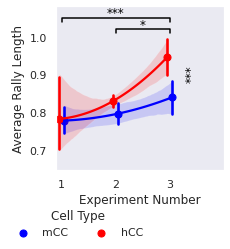

In [9]:
labels = [' ', '1', '2', '3']
px = primary_dfs['exp']
py = primary_dfs['hit_count']
hx = hCC_dfs['exp']
hy = hCC_dfs['hit_count']
f, ax = plt.subplots()
sns.set(style="darkgrid")
sns.regplot(x=(ax.xaxis.convert_units(px)+0.05), y=py, x_estimator=np.mean, order = 2, label = "mCC", color = 'blue', x_ci = "ci")
sns.regplot(x=(ax.xaxis.convert_units(hx)-0.05), y=hy, x_estimator=np.mean, order = 2, label = "hCC", color = 'red', x_ci = "ci")
sns.set(style="darkgrid", palette="Set2")
ax.set_xlim([0.9, 4])
ax.set_ylim([0.65, 1.08])
ax.set_xlabel('Experiment Number')
ax.set_ylabel('Average Rally Length')
#ax.set_title('Pong Performance in Last 15 Minute by Experiment')
ax.set_xticklabels(labels)
L = plt.legend(loc='lower left', bbox_to_anchor=(-0.3, -0.45), title = "Cell Type", borderaxespad=0.1, frameon=False, ncol = 2)
ax.grid(False)
col = "black"
h = 0.01
y = 0.89

plt.text(2.5, y+0.124, "*", ha='center', va='bottom', color=col)
plt.plot([2, 2, 3, 3], [y+0.12, y+(h+0.12), y+(h+0.12), y+0.12], lw=1.5, c=col)
plt.text(2, y+0.155, "***", ha='center', va='bottom', color=col)
plt.plot([1, 1, 3, 3], [y+0.15, y+(h+0.15), y+(h+0.15), y+0.15], lw=1.5, c=col)
plt.text(3.4, 0.88, "***", ha='center', va='bottom', color=col, rotation=90)
sns.set(rc={'figure.figsize':(3,3)})
#plt.savefig('/home/jovyan/work/dishpill/Analysis/Plots/performancebyexperiment.pdf', bbox_inches='tight')  
